In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/data_5m/2021-01-04.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# 拆分date_time列为date和time两列
df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')
df['time'] = df['datetime'].dt.strftime('%H:%M:%S')
df

,code,datetime,open,close,high,low,volume,money,date,time
0,000001.XSHE,2021-01-04 09:35:00,1998.4139,1946.0994,1998.4139,1935.6365,149014.6407,232597099.0,2021-01-04,09:35:00
1,000001.XSHE,2021-01-04 09:40:00,1942.9605,1945.0531,1950.2846,1937.7291,107353.7797,165336799.0,2021-01-04,09:40:00
2,000001.XSHE,2021-01-04 09:45:00,1942.9605,1949.2383,1954.4697,1929.3588,115148.1910,177234625.0,2021-01-04,09:45:00
3,000001.XSHE,2021-01-04 09:50:00,1949.2383,1954.4697,1963.8863,1947.1457,71354.1295,110667497.0,2021-01-04,09:50:00
4,000001.XSHE,2021-01-04 09:55:00,1954.4697,1946.0994,1954.4697,1944.0068,39160.3521,60488763.0,2021-01-04,09:55:00
...,...,...,...,...,...,...,...,...,...,...
198763,689009.XSHG,2021-01-04 14:40:00,90.0000,89.4500,90.0000,89.4000,61120.0000,5483971.0,2021-01-04,14:40:00
198764,689009.XSHG,2021-01-04 14:45:00,89.5000,88.3700,89.6000,88.1800,178157.0000,15774413.0,2021-01-04,14:45:00
198765,689009.XSHG,2021-01-04 14:50:00,88.3700,88.6700,89.0000,88.3700,129375.0000,11485766.0,2021-01-04,14:50:00
198766,689009.XSHG,2021-01-04 14:55:00,88.6600,88.4600,88.8700,88.3000,191615.0000,16964487.0,2021-01-04,14:55:00


In [4]:
df.groupby('code')['volume'].std()

code
000001.XSHE     24733.158091
000002.XSHE     26843.999002
000004.XSHE     12543.921421
000005.XSHE     12679.960494
000006.XSHE      5363.356157
                   ...      
688699.XSHG     27852.164994
688777.XSHG     49483.569152
688788.XSHG     25908.662199
688981.XSHG    603137.118846
689009.XSHG     99407.807169
Name: volume, Length: 4141, dtype: float64

<Figure size 1800x1200 with 0 Axes>

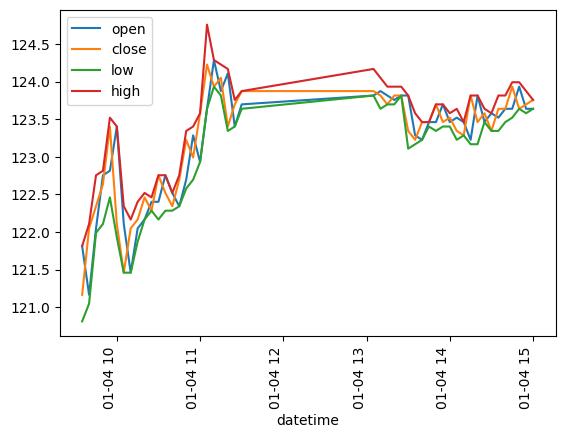

In [5]:
sample = df[df['code'] == '000004.XSHE']

sample.set_index('datetime', inplace=True)

plt.figure(figsize=(18, 12))

sample[['open', 'close', 'low', 'high']].plot()

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# 日内截面基本信息生成
result_df = df.copy()

mean_close = result_df.groupby('code')['close'].mean()

std_close = result_df.groupby('code')['close'].std()

max_close = result_df.groupby('code')['close'].max()

min_close = result_df.groupby('code')['close'].min()

q1_close = result_df.groupby('code')['close'].quantile(0.25)

q3_close = result_df.groupby('code')['close'].quantile(0.75)

mad_close = result_df.groupby('code')['close'].mad()

skew_close = result_df.groupby('code')['close'].skew()


In [ ]:
mean_close

In [ ]:
# 日内时段信息筛选
# 上午盘
result_df = df.copy()
result_df = result_df[(result_df['time'] <= '11:30:00')]
vol_sum1 = result_df.groupby('code')['volume'].sum()

# 下午盘
result_df = df.copy()
result_df = result_df[(result_df['time'] >= '13:30:00')]
vol_sum2 = result_df.groupby('code')['volume'].sum()

# 收开盘附近时间
result_df = df.copy()
result_df = result_df[(result_df['time'] <= '10:00:00') | (result_df['time'] >= '14:30:00')]
vol_sum3 = result_df.groupby('code')['volume'].sum()

# 其他时间信息
最大波峰、波谷之间的时间差
最大连续上涨时间长度

In [ ]:
# 日内信息筛选
result_df = df.copy()
tmp = result_df[(result_df['close'] > result_df['open'])].groupby('code')['volume'].sum()
result_3 = tmp.to_frame().reset_index().rename(columns={'volume':'pro_vol_sum'})


df = result_df.copy()
df['close_diff'] = df.groupby('code')['close'].diff()
tmp = df[(df['close_diff'] > 0])].groupby('code')['volume'].sum()
result_4 = tmp.to_frame().reset_index().rename(columns={'volume':'gap_vol_sum'})


In [ ]:
# 日内信息相关性考察
df = result_df.copy()
tmp = result_df.groupby('code').apply(lambda x : x['close'].corr(x['low']))
result_5 = tmp.to_frame().reset_index().rename(columns={0:'cor_close_low'})


df = result_df.copy()
tmp = result_df.groupby('code').apply(lambda x : x['close'].corr(x['low'].shift(1))) #对日频信号而言是否引入了未来信息？
result_6 = tmp.to_frame().reset_index().rename(columns={0:'cor_close_low2'})
  
